## Understanding the dataset

In [0]:
#from google.colab import files
#files.upload()

In [0]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('data.csv')

In [0]:
#df.head(5)

In [220]:
df.shape

(30697, 28)

In [0]:
#df.columns

In [0]:
#df.isnull().sum()

## Split into train and test data

In [223]:
test = df[df["is_goal"].isnull()]
print(test.shape)

(6268, 28)


In [0]:
#test.isnull().sum()

In [225]:
train = df[df["is_goal"].notnull()]
print(train.shape)

(24429, 28)


In [0]:
#train.isnull().sum()

## Handling missing values

In [0]:
df.fillna(df.mean(), inplace = True)

In [0]:
#df.isnull().sum()

In [229]:
train.fillna(train.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#train.isnull().sum()

In [231]:
test.fillna(test.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#test.isnull().sum()

## Collecting required data for predictions

In [233]:
## Combining minutes and seconds to get time

df["remaining_time"] = df["remaining_min"]*60 + df["remaining_sec"]
train["remaining_time"] = train["remaining_min"]*60 + train["remaining_sec"]
test["remaining_time"] = test["remaining_min"]*60 + test["remaining_sec"]

df["remaining_time.1"] = df["remaining_min.1"]*60 + df["remaining_sec.1"]
train["remaining_time.1"] = train["remaining_min.1"]*60 + train["remaining_sec.1"]
test["remaining_time.1"] = test["remaining_min.1"]*60 + test["remaining_sec.1"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [0]:
#train["area_of_shot"].unique()

In [0]:
#train["area_of_shot"].mode()

In [236]:
## Mapping area of shot to integer values

area_of_shot_map = {'Left Side(L)':1, 'Left Side Center(LC)':2, 'Right Side Center(RC)':3, 'Center(C)':4, 'Right Side(R)':5, 'Mid Ground(MG)':6, np.nan:4}

df["area_of_shot"] = df["area_of_shot"].map(lambda x:area_of_shot_map[x])
train["area_of_shot"] = train["area_of_shot"].map(lambda x:area_of_shot_map[x])
test["area_of_shot"] = test["area_of_shot"].map(lambda x:area_of_shot_map[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [347]:
train.isnull().sum()

Unnamed: 0                   0
match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season               4632
remaining_sec                0
distance_of_shot             0
is_goal                      0
area_of_shot                 0
shot_basics                  0
range_of_shot                0
team_name                 1212
date_of_game              1237
home/away                 1214
shot_id_number               0
lat/lng                   1247
type_of_shot             12136
type_of_combined_shot    12293
match_id                     0
team_id                      0
remaining_min.1              0
power_of_shot.1              0
knockout_match.1             0
remaining_sec.1              0
distance_of_shot.1           0
remaining_time               0
remaining_time.1             0
dtype: int64

In [0]:
#train["range_of_shot"].unique()

In [0]:
#train["range_of_shot"].mode()

In [240]:
## Mapping range of shot to integer values

range_of_shot_map = {'8-16 ft.':1, '16-24 ft.':2, 'Less Than 8 ft.':3, '24+ ft.':4, 'Back Court Shot':5, np.nan:3}

df["range_of_shot"] = df["range_of_shot"].map(lambda x:range_of_shot_map[x])
train["range_of_shot"] = train["range_of_shot"].map(lambda x:range_of_shot_map[x])
test["range_of_shot"] = test["range_of_shot"].map(lambda x:range_of_shot_map[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#train["shot_basics"].unique()

In [0]:
#train["shot_basics"].mode()

In [243]:
## Mapping shot basics to integer values

shot_basics_map = {'Mid Range':1, 'Goal Area':2, 'Goal Line':3, 'Penalty Spot':4, 'Right Corner':5, 'Mid Ground Line':6, 'Left Corner':7, np.nan:1}

df["shot_basics"] = df["shot_basics"].map(lambda x:shot_basics_map[x])
train["shot_basics"] = train["shot_basics"].map(lambda x:shot_basics_map[x])
test["shot_basics"] = test["shot_basics"].map(lambda x:shot_basics_map[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#train.isnull().sum()

In [0]:
Y = train["is_goal"].values
#print(Y)

In [0]:
X = train[["power_of_shot", "distance_of_shot", "remaining_time", "area_of_shot", "range_of_shot", "shot_basics", "location_x", "location_y", "power_of_shot.1"
           , "remaining_time.1", "distance_of_shot.1"]]
#print(X.head())

## Feature Selection

### 1. Univariate Selection

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [0]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [249]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  

                 Specs     Score
5          shot_basics  0.025739
7           location_y  0.023576
1     distance_of_shot  0.021737
4        range_of_shot  0.018469
10  distance_of_shot.1  0.017124
6           location_x  0.015201
3         area_of_shot  0.014625
9     remaining_time.1  0.007076
2       remaining_time  0.004545
0        power_of_shot  0.002736


### 2. Feature Importance

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [251]:
model.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [252]:
print(model.feature_importances_)

[0.0584891  0.07486704 0.18210699 0.02325387 0.01803853 0.01639545
 0.13160937 0.13094905 0.08536406 0.18106973 0.09785681]


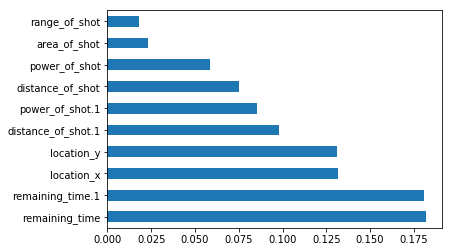

In [253]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Final training and testing data

In [0]:
X_train = train[["remaining_time", "remaining_time.1", "location_x", "location_y", "distance_of_shot.1", "power_of_shot.1", "distance_of_shot", "power_of_shot"]]
X_test = test[["remaining_time", "remaining_time.1", "location_x", "location_y", "distance_of_shot.1", "power_of_shot.1", "distance_of_shot", "power_of_shot"]]

# PREDICTIONS

In [0]:
Y_true = Y

### 1. Logistic Regression

In [0]:
#from sklearn.linear_model import LogisticRegression

In [0]:
#classifier_logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [0]:
#classifier_logistic.fit(X,Y)

In [0]:
#Y_predict_logistic = classifier_logistic.predict(X)

### 2. KNN

In [0]:
#from sklearn.neighbors import KNeighborsClassifier

In [0]:
#classifier_knn = KNeighborsClassifier(n_neighbors=3)

In [0]:
#classifier_knn.fit(X,Y)

In [0]:
#Y_predict_knn = classifier_knn.predict(X)

### 3. Support Vector Machine

In [0]:
#from sklearn.svm import SVC

In [0]:
#classifier_svm = SVC(gamma = 'auto', probability=True)

In [0]:
#classifier_svm.fit(X,Y)

In [0]:
#classifier_svm.score(X, Y)

In [0]:
#Y_predict_svm = classifier_svm.predict_proba(X)
#Y_predict_svm = classifier_svm.predict(X)
#print(Y_predict_svm)

### 4. Random Forest 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier_randomforest = RandomForestClassifier(n_estimators=5, max_depth=16, random_state=0)

In [271]:
classifier_randomforest.fit(X_train,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#classifier_randomforest.score(X,Y)

In [0]:
Y_predict_rf = classifier_randomforest.predict(X_train)

### 5. XGBoost

In [0]:
import xgboost as xgb

In [0]:
classifier_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [276]:
classifier_xgb.fit(X_train,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
#classifier_xgb.feature_importances_

In [0]:
Y_predict_xgb = classifier_xgb.predict(X_train)

### 6. Gradient Boosting 

In [0]:
#from sklearn.ensemble import GradientBoostingClassifier

In [0]:
#classifier_gb = GradientBoostingClassifier()

In [0]:
#classifier_gb.fit(X,Y)

In [0]:
#Y_predict_gb = classifier_gb.predict(X)

### 7. Decision Tree

In [0]:
#from sklearn.tree import DecisionTreeClassifier

In [0]:
#classifier_decisionT = DecisionTreeClassifier(random_state=0)

In [0]:
#classifier_decisionT.fit(X,Y)

In [0]:
#Y_predict_decisionT = classifier_decisionT.predict(X)

### 8. Naive Bayes

In [0]:
#from sklearn.naive_bayes import *

In [0]:
#classifier_nb_bernoulli = BernoulliNB()
#classifier_nb_multinomial = MultinomialNB()
#classifier_nb_gaussian = GaussianNB()

In [0]:
#classifier_nb_bernoulli.fit(X,Y)

In [0]:
#classifier_nb_multinomial.fit(X,Y)

In [0]:
#classifier_nb_gaussian.fit(X,Y)

In [0]:
#Y_predict_nb_bernoulli = classifier_nb_bernoulli.predict(X)
#Y_predict_nb_multinomial = classifier_nb_multinomial.predict(X)
#Y_predict_nb_gaussian = classifier_nb_gaussian.predict(X)

### 9. Neural Networks

In [0]:
#from sklearn.neural_network import MLPClassifier

In [0]:
#classifier_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
 #                    solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [0]:
#classifier_mlp.fit(X,Y)

In [0]:
#Y_predict_mlp = classifier_mlp.predict(X)

### 10. Ada Boost

In [0]:
#from sklearn.ensemble import AdaBoostClassifier

In [0]:
#classifier_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

In [0]:
#classifier_ada.fit(X,Y)

In [0]:
#Y_predict_ada = classifier_ada.predict(X)

### 11. Quadratic Discriminant Analysis

In [0]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
#classifier_qda = QuadraticDiscriminantAnalysis()

In [0]:
#classifier_qda.fit(X,Y)

In [0]:
#Y_predict_qda = classifier_qda.predict(X)

## Calculating MAE score

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
#mean_absolute_error(Y_true, Y_predict_logistic)

In [0]:
#mean_absolute_error(Y_true, Y_predict_knn)

In [0]:
#mean_absolute_error(Y_true, Y_predict_svm)

In [309]:
mean_absolute_error(Y_true, Y_predict_rf)

0.25240492856850466

In [310]:
mean_absolute_error(Y_true, Y_predict_xgb)

0.3846657660976708

In [0]:
#mean_absolute_error(Y_true, Y_predict_gb)

In [0]:
#mean_absolute_error(Y_true, Y_predict_decisionT)

In [0]:
#mean_absolute_error(Y_true, Y_predict_nb_bernoulli)

In [0]:
#mean_absolute_error(Y_true, Y_predict_nb_multinomial)

In [0]:
#mean_absolute_error(Y_true, Y_predict_nb_gaussian)

In [0]:
#mean_absolute_error(Y_true, Y_predict_mlp)

In [0]:
#mean_absolute_error(Y_true, Y_predict_ada)

In [0]:
#mean_absolute_error(Y_true, Y_predict_qda)

In [0]:
# score = 1/(1+mae)
# print(score)

## Calculating cross-validation score

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
#cross_val_score(classifier_logistic, X, Y)

In [0]:
#cross_val_score(classifier_knn, X, Y)

In [0]:
#cross_val_score(classifier_svm, X, Y)

In [324]:
cross_val_score(classifier_randomforest, X_train, Y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5743992803115414

In [325]:
cross_val_score(classifier_xgb, X_train, Y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6083345840382477

In [0]:
#cross_val_score(classifier_gb, X, Y)

In [0]:
#cross_val_score(classifier_decisionT, X, Y)

In [0]:
#cross_val_score(classifier_nb_bernoulli, X, Y)

In [0]:
#cross_val_score(classifier_nb_multinomial, X, Y)

In [0]:
#cross_val_score(classifier_nb_gaussian, X, Y)

In [0]:
#cross_val_score(classifier_mlp, X, Y)

In [0]:
#cross_val_score(classifier_ada, X, Y).mean()

In [0]:
#cross_val_score(classifier_qda, X, Y)

## Predictions

In [0]:
# Y_predict_decisionT_test = classifier_decisionT.predict_proba(X_test)
# predict_dt = Y_predict_decisionT_test[:,1]
# print(predict_dt)

In [0]:
# plt.hist(predict_dt)

In [336]:
Y_predict_rf_test = classifier_randomforest.predict_proba(X_test)
predict_rf = Y_predict_rf_test[:,1]
print(predict_rf)

[0.414693   0.48236801 0.76748768 ... 0.43948218 0.46459534 0.63812577]


(array([  93.,  247.,  701., 1372., 1634.,  966.,  779.,  327.,  121.,
          28.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

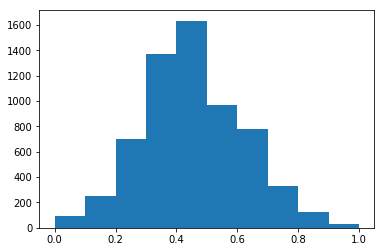

In [337]:
plt.hist(predict_rf)

In [338]:
Y_predict_xgb_test = classifier_xgb.predict_proba(X_test)
predict_xgb = Y_predict_xgb_test[:,1]
print(predict_xgb)

[0.40351892 0.52464515 0.5507851  ... 0.45527315 0.4464496  0.64934754]


(array([  28.,   13.,   66.,  189.,  974., 2529., 1090.,  188.,  893.,
         298.]),
 array([0.01429315, 0.08575769, 0.15722223, 0.22868676, 0.3001513 ,
        0.37161583, 0.44308037, 0.5145449 , 0.58600944, 0.657474  ,
        0.7289385 ], dtype=float32),
 <a list of 10 Patch objects>)

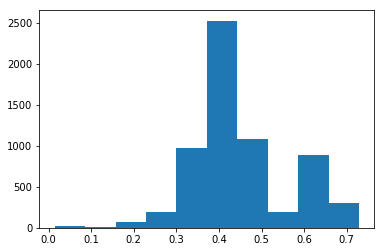

In [339]:
plt.hist(predict_xgb)

In [0]:
# Y_predict_ada_test = classifier_ada.predict_proba(X_test)
# predict_ada = Y_predict_ada_test[:,1]
# print(predict_ada)

In [0]:
# plt.hist(predict_ada)

## Writing predicted outputs to a .csv file

In [0]:
#test["shot_id_number"] = test.index+1

In [0]:
#test["shot_id_number"].shape

In [0]:
#X_test.shape[0]

In [0]:
import csv

cs = pd.DataFrame({"shot_id_number":test["shot_id_number"], "is_goal":predict_rf})
#cs.head()
cs.to_csv('cheshta_kwatra_032998_prediction_4.csv', index=False)

In [0]:
files.download('cheshta_kwatra_032998_prediction_4.csv')